# Graph Coloring

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">錢映伶</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

##### Overview
Given a simple graph $G$ with a vertex set $V=\{v_1, v_2, \ldots, v_n\}$ and a color set $[m]:=\{1,\ldots,m\}$,  
an **$m$-coloring** of $G$ is an assignment $c:V\rightarrow [m]$.  

A **proper $m$-coloring** on a graph $G$ is an $m$-coloring $c$ such that  
$v_i$ and $v_j$ have different colors if $v_i$ and $v_j$ are connected by an edge $\forall i, j \in [n]$.

The goal is to find the smallest $m$ such that $G$ has a proper $m$-coloring.  
This minimum $m$ is called the **chromatic number** of $G$, denoted as $\chi(G)$.

##### Algorithm (Greedy coloring algorithm)

1. Given a graph $G$ and a vertex ordering $\{v_1, v_2, \ldots, v_n\}$
2. For each $i$, color $v_i$ with the smallest positive integer $j$ such that  
$j$ is not used in any of neighbors of $v_i$.
3. Output the number of colors used $(j)$.

##### Explanation

Given a graph $G$ with a vertex set $V$ and an edge set $E$  
Label the vertices as $V=\{0, 1, \dots, n-1\}$.  
By the **Geedy Algorithm**, color the vertex 0 with color `c[1]`.  
If vertex 1 is a neighbor of vertex 0, then color vertex 1 with `c[2]`.   
If not, then color vertex 1 with `c[1]`.  
But notice that the output of Greedy Algorithm might not be the minimum color set.

##### Implementation

In [1]:
def greedy_coloring(g, vertex_order=None, show_color=False):
    """
    Input:
        g: a simple graph
        vertex_order: a list of vertices of g;
                      if None, g.vertices() is taken.
        show_color: show the graph with the output color if True
    Output:
        a coloring
    """
    if vertex_order==None:
        vertex_order = g.vertices()
    n = g.order()
    
    coloring={}
    for v in vertex_order:
        color_in_nbr = []
        colored = coloring.keys()
        for u in g.neighbors(v):
            if u in colored:
                color_in_nbr.append(coloring[u])
        for color in range(n):
            coloring[v] = n
            if u in g.neighbors(v):
                coloring[u] = n + 1
        
    if show_color: 
        num_colors = max(coloring.values()) + 1
        colors = rainbow(num_colors) ### colors is a list of num_colors colors
        ### the coloring few lines create a dictionary {color: [vertices]}
        c = {colors[i]: [] for i in range(num_colors)}
        for v in vertex_order:
            i = coloring[v]
            c[colors[i]].append(v)
        g.show(vertex_color=c)
    return coloring

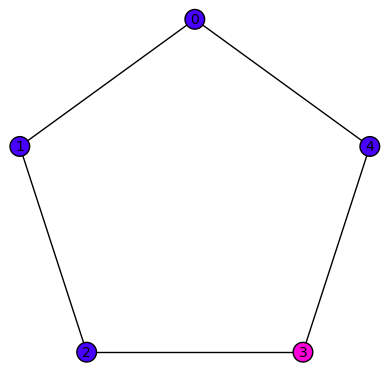

{0: 5, 1: 5, 2: 5, 3: 6, 4: 5}


In [4]:
g = graphs.CycleGraph(5)
print greedy_coloring(g,show_color=True)

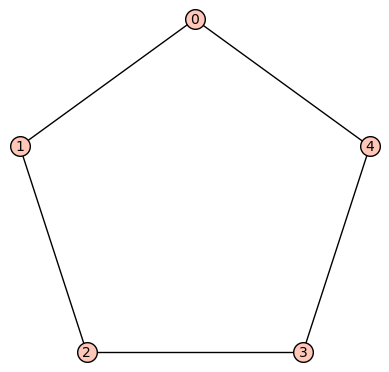

vertices [0, 1, 2, 3, 4]
edges [(0, 1, None), (0, 4, None), (1, 2, None), (2, 3, None), (3, 4, None)]
neighbors of 0 [1, 4]
the color for vertex 3 is 1


In [5]:
### some functions of graph

### graphs contains many built-in graphs
g = graphs.CycleGraph(5)

g.show()

print "vertices", g.vertices()
print "edges", g.edges()
print "neighbors of 0", g.neighbors(0)

### an example of coloring
### c = {vertex: color}
c = {0:0, 1:1, 2:0, 3:1, 4:2}

### call a color
print "the color for vertex 3 is", c[3]

##### Examples

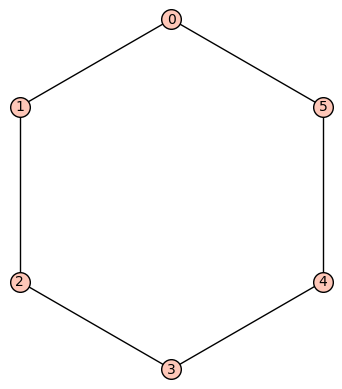

vertices [0, 1, 2, 3, 4, 5]
edges [(0, 1, None), (0, 5, None), (1, 2, None), (2, 3, None), (3, 4, None), (4, 5, None)]
neighbors of 0 [1, 5]


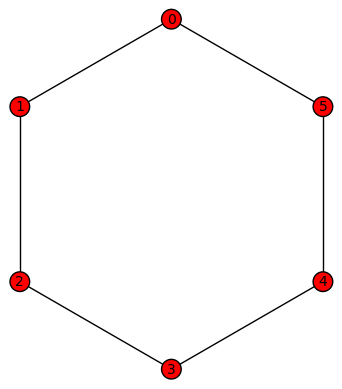

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}


In [6]:
### Cycle graph
g = graphs.CycleGraph(6)
g.show()

print "vertices", g.vertices()
print "edges", g.edges()
print "neighbors of 0", g.neighbors(0)


def greedy_coloring(g, vertex_order=None, show_color=False):
    """
    Input:
        g: a simple graph
        vertex_order: a list of vertices of g;
                      if None, g.vertices() is taken.
        show_color: show the graph with the output color if True
    Output:
        a coloring
    """
    if vertex_order==None:
        vertex_order = g.vertices()
    coloring={}
    for v in vertex_order:
        coloring[0] = 0
        if v + 1 == g.neighbors(v):
            coloring[v + 1] = coloring[v] + 1    ### this part your need to find a proper j and assign coloring[v] = j
        if v + 1 != g.neighbors(v):
            coloring[v + 1] = coloring[v]
        
    if show_color: 
        num_colors = max(coloring.values()) + 1
        colors = rainbow(num_colors) ### colors is a list of num_colors colors
        ### the coloring few lines create a dictionary {color: [vertices]}
        c = {colors[i]: [] for i in range(num_colors)}
        for v in vertex_order:
            i = coloring[v]
            c[colors[i]].append(v)
        g.show(vertex_color=c)
    return coloring
        
print greedy_coloring(g,show_color=True)

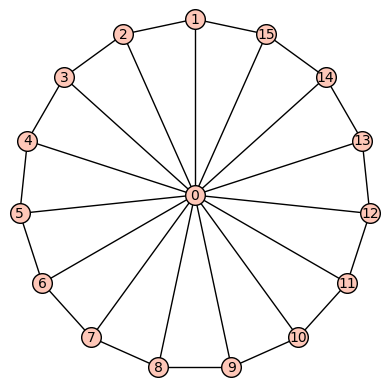

vertices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
edges [(0, 1, None), (0, 2, None), (0, 3, None), (0, 4, None), (0, 5, None), (0, 6, None), (0, 7, None), (0, 8, None), (0, 9, None), (0, 10, None), (0, 11, None), (0, 12, None), (0, 13, None), (0, 14, None), (0, 15, None), (1, 2, None), (1, 15, None), (2, 3, None), (3, 4, None), (4, 5, None), (5, 6, None), (6, 7, None), (7, 8, None), (8, 9, None), (9, 10, None), (10, 11, None), (11, 12, None), (12, 13, None), (13, 14, None), (14, 15, None)]
neighbors of 0 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


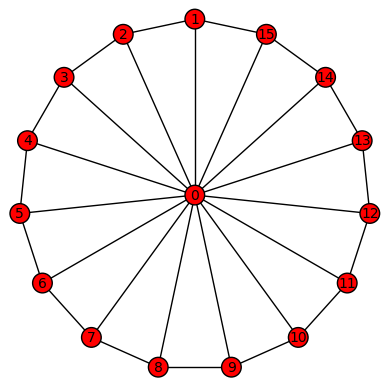

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0}


In [7]:
### Wheel graph
g = graphs.WheelGraph(16)
g.show()

print "vertices", g.vertices()
print "edges", g.edges()
print "neighbors of 0", g.neighbors(0)


def greedy_coloring(g, vertex_order=None, show_color=False):
    """
    Input:
        g: a simple graph
        vertex_order: a list of vertices of g;
                      if None, g.vertices() is taken.
        show_color: show the graph with the output color if True
    Output:
        a coloring
    """
    if vertex_order==None:
        vertex_order = g.vertices()
    coloring={}
    for v in vertex_order:
        coloring[0] = 0
        if v + 1 == g.neighbors(v):
            coloring[v + 1] = coloring[v] + 1    ### this part your need to find a proper j and assign coloring[v] = j
        if v + 1 != g.neighbors(v):
            coloring[v + 1] = coloring[v]
        
    if show_color: 
        num_colors = max(coloring.values()) + 1
        colors = rainbow(num_colors) ### colors is a list of num_colors colors
        ### the coloring few lines create a dictionary {color: [vertices]}
        c = {colors[i]: [] for i in range(num_colors)}
        for v in vertex_order:
            i = coloring[v]
            c[colors[i]].append(v)
        g.show(vertex_color=c)
    return coloring
        
print greedy_coloring(g,show_color=True)

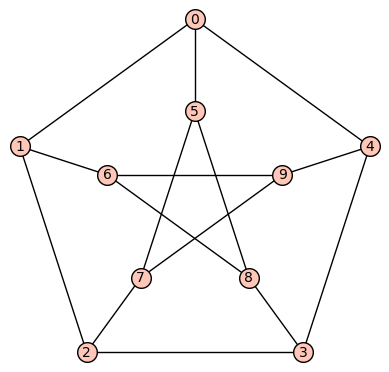

vertices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges [(0, 1, None), (0, 4, None), (0, 5, None), (1, 2, None), (1, 6, None), (2, 3, None), (2, 7, None), (3, 4, None), (3, 8, None), (4, 9, None), (5, 7, None), (5, 8, None), (6, 8, None), (6, 9, None), (7, 9, None)]
neighbors of 0 [1, 4, 5]


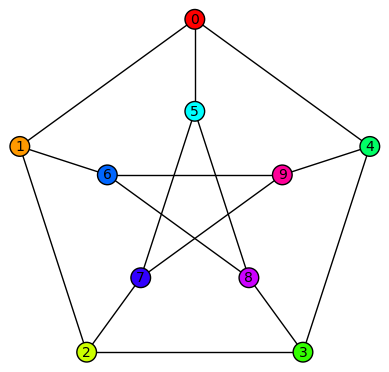

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [8]:
### Petersen graph
g = graphs.PetersenGraph()
g.show()

print "vertices", g.vertices()
print "edges", g.edges()
print "neighbors of 0", g.neighbors(0)


def greedy_coloring(g, vertex_order=None, show_color=False):
    """
    Input:
        g: a simple graph
        vertex_order: a list of vertices of g;
                      if None, g.vertices() is taken.
        show_color: show the graph with the output color if True
    Output:
        a coloring
    """
    if vertex_order==None:
        vertex_order = g.vertices()
    coloring={}
    for v in vertex_order:
        coloring[v] = v ### this part your need to find a proper j and assign coloring[v] = j
        
    if show_color: 
        num_colors = max(coloring.values()) + 1
        colors = rainbow(num_colors) ### colors is a list of num_colors colors
        ### the coloring few lines create a dictionary {color: [vertices]}
        c = {colors[i]: [] for i in range(num_colors)}
        for v in vertex_order:
            i = coloring[v]
            c[colors[i]].append(v)
        g.show(vertex_color=c)
    return coloring
        
print greedy_coloring(g,show_color=True)